In [1]:
from tensorflow import keras
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
with open('x_test_values.pickle', 'rb') as file:
    x_test_values = pickle.load(file)

with open('y_test.pickle', 'rb') as file:
    y_test = pickle.load(file)


In [3]:
# Manually set the masking value for the first masking layer
model = keras.models.load_model('model.keras')
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 352, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 352, 50)        │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 352, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,255 (278.34 KB)

 Trainable params: 23,751 (92.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,504 (185.57 KB)

None


In [4]:
y_pred = model.predict(np.array(x_test_values))

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


In [5]:
dftrain = pd.read_csv("data/plasticc_train_metadata.csv")

dftest = pd.read_csv("data/plasticc_test_metadata.csv")

dftest = dftest[:20000]

dftest['target'] = dftest['true_target']

dftrain = pd.concat([dftrain, dftest], axis=0, ignore_index=True)

sn_models = [90, 67, 52, 42, 62, 95, 15]
dftrain = dftrain[dftrain['target'].isin(sn_models)]


In [6]:
lcs = pd.read_csv("data/plasticc_train_lightcurves.csv")

lcs_test = pd.read_csv("data/plasticc_test_lightcurves_01.csv")

lcs = pd.concat([lcs, lcs_test[:3000000]], axis=0, ignore_index=True)

In [7]:
def display_object(object_id, lightcurve_data, metadata, predicted=0):
    lightcurve_data = lightcurve_data[lightcurve_data['object_id'] == object_id]
    passbands = []
    true_peaktime = metadata[metadata['object_id'] == object_id]['true_peakmjd']
    print(true_peaktime)

    for freq in range(6):
        passbands.append(lightcurve_data[lightcurve_data['passband'] == freq][['mjd', 'flux']])

    for p in passbands:
        plt.scatter(p['mjd'], p['flux'])
        print(true_peaktime)
        plt.plot([true_peaktime.values[0], true_peaktime.values[0]], [0,250])
        if predicted > 0:
            plt.plot([predicted, predicted], [-250, 250])
        

    # plt.xlabel("Modified Julien Date")

    # plt.ylabel("Flux")
    
    # plt.show()
    plt.show()


16879    60386.324
Name: true_peakmjd, dtype: float64
16879    60386.324
Name: true_peakmjd, dtype: float64
16879    60386.324
Name: true_peakmjd, dtype: float64
16879    60386.324
Name: true_peakmjd, dtype: float64
16879    60386.324
Name: true_peakmjd, dtype: float64
16879    60386.324
Name: true_peakmjd, dtype: float64
16879    60386.324
Name: true_peakmjd, dtype: float64


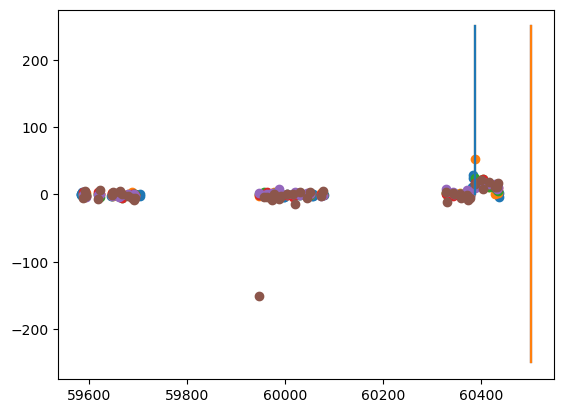

12612    60413.102
Name: true_peakmjd, dtype: float64
12612    60413.102
Name: true_peakmjd, dtype: float64
12612    60413.102
Name: true_peakmjd, dtype: float64
12612    60413.102
Name: true_peakmjd, dtype: float64
12612    60413.102
Name: true_peakmjd, dtype: float64
12612    60413.102
Name: true_peakmjd, dtype: float64
12612    60413.102
Name: true_peakmjd, dtype: float64


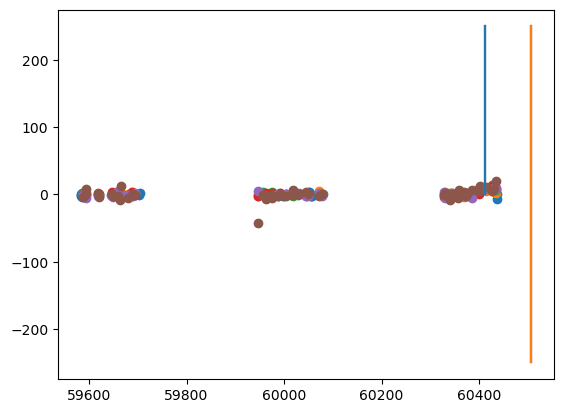

2452    60020.273
Name: true_peakmjd, dtype: float64
2452    60020.273
Name: true_peakmjd, dtype: float64
2452    60020.273
Name: true_peakmjd, dtype: float64
2452    60020.273
Name: true_peakmjd, dtype: float64
2452    60020.273
Name: true_peakmjd, dtype: float64
2452    60020.273
Name: true_peakmjd, dtype: float64
2452    60020.273
Name: true_peakmjd, dtype: float64


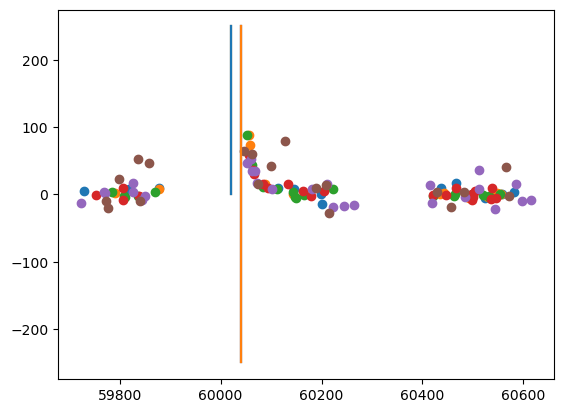

In [8]:
for i in range(3):
    display_object(y_test[i][0], lcs, dftrain, y_pred[i][0]*2000+59000)